<a href="https://colab.research.google.com/github/jinwoo3239/rdkit/blob/main/rdkit_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install DeepChem

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 608 kB 8.6 MB/s 
     |████████████████████████████████| 22.7 MB 64.9 MB/s 


In [4]:
import rdkit
from rdkit import Chem
from rdkit.Chem import Draw

In [5]:
rdkit.__version__

'2022.03.4'

In [6]:
m = Chem.MolFromSmiles('Cc1ccccc1')
m

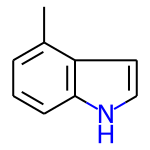

In [34]:
Chem.Draw.MolToImage(m, size=(150, 150))

In [39]:
print(Chem.MolToSmiles(m)) # Caconical form
print(Chem.MolToSmiles(m, kekuleSmiles=True)) # Kekular form

Cc1cccc2[nH]ccc12
CC1=CC=CC2=C1C=CN2


In [19]:
!wget https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/input.mol

--2022-08-07 01:01:33--  https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/input.mol
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1024 (1.0K) [text/plain]
Saving to: ‘input.mol’

input.mol           100%[===================>]   1.00K  --.-KB/s    in 0s      

2022-08-07 01:01:34 (63.8 MB/s) - ‘input.mol’ saved [1024/1024]



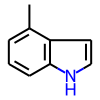

In [21]:
m = Chem.MolFromMolFile('input.mol')
m
Chem.Draw.MolToImage(m, size=(100, 100))

In [22]:
type(m)

rdkit.Chem.rdchem.Mol

In [23]:
!wget https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/5ht3ligs.sdf

--2022-08-07 01:10:16--  https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/5ht3ligs.sdf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9578 (9.4K) [text/plain]
Saving to: ‘5ht3ligs.sdf’

5ht3ligs.sdf        100%[===================>]   9.35K  --.-KB/s    in 0s      

2022-08-07 01:10:16 (68.5 MB/s) - ‘5ht3ligs.sdf’ saved [9578/9578]



In [24]:
# $$$$ 로 끊어져서 있음
# sdf 파일은 여러개의 분자 표현식

In [25]:
suppl = Chem.SDMolSupplier('5ht3ligs.sdf')

mols = []
for mol in suppl:
    mols.append(mol)
    print(mol.GetNumAtoms())

20
24
24
26


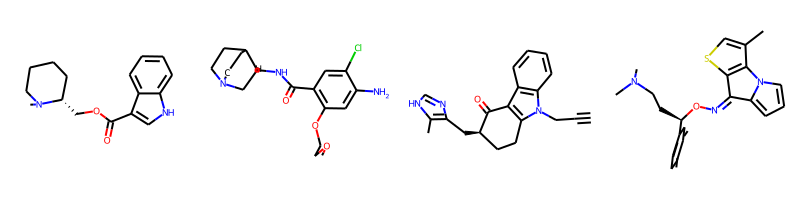

In [28]:
# 3차원 구조를 2차원 구조로 표현하다가 보니까, 링이 찌그러져 있는 것 처럼 보인다
Chem.Draw.MolsToGridImage(mols, molsPerRow=4)

In [ ]:
# Caconical smiles 로 내보니기로 해준다.

In [36]:
Chem.MolToSmiles(Chem.MolFromSmiles('C1=CC=CN=C1'))

'c1ccncc1'

In [37]:
Chem.MolToSmiles(Chem.MolFromSmiles('c1cccnc1'))

'c1ccncc1'

In [38]:
Chem.MolToSmiles(Chem.MolFromSmiles('c1cccnc1'))

'c1ccncc1'

In [40]:
Chem.MolToMolFile(m, "test.mol")

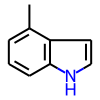

In [41]:
m_test = Chem.MolFromMolFile('test.mol')
Chem.Draw.MolToImage(m_test, size=(100, 100))

In [44]:
m_test.SetProp("_Name", 'test_name')
print(Chem.MolToMolBlock(m_test))

test_name
     RDKit          2D

 10 11  0  0  0  0  0  0  0  0999 V2000
   -3.2411   -0.5303    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.9555   -0.9428    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.9555   -1.7679    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.2411   -2.1804    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.5266   -1.7679    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.5266   -0.9428    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.8122   -2.1803    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0977   -0.9428    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0977   -1.7678    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.2411    0.2947    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  2  0
  1  6  1  0
  2  3  1  0
  3  4  2  0
  4  5  1  0
  6  8  1  0
  5  6  2  0
  7  5  1  0
  7  9  1  0
  8  9  2  0
  1 10  1  0
M  END



In [45]:
# 분자에 문제가 있으면 none 을 return
import gzip

fp = gzip.open('actives_5ht3.sdf.gz')
suppl = Chem.ForwardSDMolSupplier(fp)

mols = [mol for mol in suppl if mol is not None]
len(mols)

180

In [46]:
mols[0]

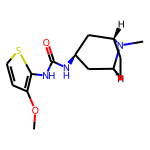

In [47]:
Chem.Draw.MolToImage(mols[0], size=(150, 150))

In [48]:
# file 로 저장하기
with Chem.SDWriter('test_mols.sdf') as fout:
    for mol in mols:
        fout.write(mol)

In [52]:
# 이 분자들은 수소가 보통 없음...
test_suppl = Chem.SDMolSupplier('test_mols.sdf')

# Chem.Draw.MolsToGridImage(test_suppl, molsPerRow=4, )

In [54]:
# 수소를 붙여보기

# Chem.AddHs function 을 이용함.. 이때 새로운 분자를 return

m1 = test_suppl[0]

In [55]:
Chem.AddHs(m1)

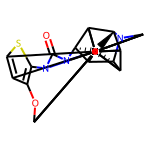

In [60]:
Chem.Draw.MolToImage(Chem.AddHs(m1), size=(150, 150))
# 단순히 수소를 붙이면, 수소의 좌표가 입력이 되지 않는다

In [56]:
print(Chem.MolToMolBlock(m1))

tpls\mol-1.tpl
     RDKit          3D

 20 22  0  0  0  0  0  0  0  0999 V2000
    1.1200   -0.6200   -1.0800 C   0  0  2  0  0  0  0  0  0  0  0  0
    1.5400    0.8200   -1.0600 N   0  0  0  0  0  0  0  0  0  0  0  0
   -0.4200   -0.6400   -1.3200 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.5600   -1.1800    0.3000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.1400    1.2200    0.3200 C   0  0  2  0  0  0  0  0  0  0  0  0
    2.9600    1.0600   -1.3800 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.2400    0.2400   -0.3000 C   0  0  2  0  0  0  0  0  0  0  0  0
    1.5600    0.0600    1.2400 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.4200    1.4600    0.2600 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.7800   -0.5600    0.7600 N   0  0  0  0  0  0  0  0  0  0  0  0
   -2.6400   -0.1600    1.7400 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0600   -1.0400    2.6800 N   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0200    1.0000    1.7600 O   0  0  0  0  0  0  0  0  0  0  0  0
   -3.9400 

In [61]:
# 수소의 좌표가 존재하지 않음

m2 = Chem.AddHs(m1)
print(Chem.MolToMolBlock(m2))

tpls\mol-1.tpl
     RDKit          3D

 41 43  0  0  0  0  0  0  0  0999 V2000
    1.1200   -0.6200   -1.0800 C   0  0  1  0  0  0  0  0  0  0  0  0
    1.5400    0.8200   -1.0600 N   0  0  0  0  0  0  0  0  0  0  0  0
   -0.4200   -0.6400   -1.3200 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.5600   -1.1800    0.3000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.1400    1.2200    0.3200 C   0  0  1  0  0  0  0  0  0  0  0  0
    2.9600    1.0600   -1.3800 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.2400    0.2400   -0.3000 C   0  0  1  0  0  0  0  0  0  0  0  0
    1.5600    0.0600    1.2400 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.4200    1.4600    0.2600 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.7800   -0.5600    0.7600 N   0  0  0  0  0  0  0  0  0  0  0  0
   -2.6400   -0.1600    1.7400 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0600   -1.0400    2.6800 N   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0200    1.0000    1.7600 O   0  0  0  0  0  0  0  0  0  0  0  0
   -3.9400 

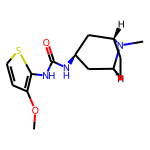

In [62]:
# 수소를 지울 때에는 Chem.RemoveHs..

m3 = Chem.RemoveHs(m2)
Chem.Draw.MolToImage(m3, size=(150, 150))

In [63]:
print(Chem.MolToMolBlock(m3))

tpls\mol-1.tpl
     RDKit          3D

 20 22  0  0  0  0  0  0  0  0999 V2000
    1.1200   -0.6200   -1.0800 C   0  0  2  0  0  0  0  0  0  0  0  0
    1.5400    0.8200   -1.0600 N   0  0  0  0  0  0  0  0  0  0  0  0
   -0.4200   -0.6400   -1.3200 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.5600   -1.1800    0.3000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.1400    1.2200    0.3200 C   0  0  2  0  0  0  0  0  0  0  0  0
    2.9600    1.0600   -1.3800 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.2400    0.2400   -0.3000 C   0  0  2  0  0  0  0  0  0  0  0  0
    1.5600    0.0600    1.2400 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.4200    1.4600    0.2600 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.7800   -0.5600    0.7600 N   0  0  0  0  0  0  0  0  0  0  0  0
   -2.6400   -0.1600    1.7400 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0600   -1.0400    2.6800 N   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0200    1.0000    1.7600 O   0  0  0  0  0  0  0  0  0  0  0  0
   -3.9400 

In [ ]:
# 분자의 3차원 구조 만들기
# 분자의 3차원 crystal 구조를 만드는 것은 매우 어려움
# 아주 정확한 3차원 구조를 얻기 위해서는 양자 계산 및 전역 최적화 (Global optimization)
# 회전 가능한 bond 의 수가 많은 수록 기하 급수적으로 늘어나게 됨...
# 3차원 구조를 만들어주는 알고리즘은, 어느 정도의 가정하고 만들게 됨... (정확하지 않음)

# RDkit 에서는 ETKDG
# AllChem.EmbedMolecule
# 입력 받은 변수를 inplace 변화를 일으킴


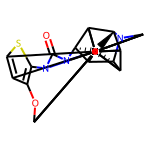

In [64]:
from rdkit.Chem import AllChem

Chem.Draw.MolToImage(m2, size=(150, 150))

In [65]:
AllChem.EmbedMolecule(m2) # error 가 생성되지 않으면 0 이 return 

0

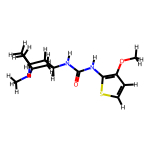

In [66]:
Chem.Draw.MolToImage(m2, size=(150, 150))

In [67]:
print(Chem.MolToMolBlock(m2))

tpls\mol-1.tpl
     RDKit          3D

 41 43  0  0  0  0  0  0  0  0999 V2000
   -3.2477    0.0333   -1.6341 C   0  0  2  0  0  0  0  0  0  0  0  0
   -3.5614   -0.6266   -0.3905 N   0  0  0  0  0  0  0  0  0  0  0  0
   -1.7722    0.3722   -1.6891 C   0  0  0  0  0  0  0  0  0  0  0  0
   -4.0795    1.2988   -1.5942 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.4943    0.4722    0.5551 C   0  0  2  0  0  0  0  0  0  0  0  0
   -4.8329   -1.2725   -0.3870 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.1730    0.1250   -0.3443 C   0  0  2  0  0  0  0  0  0  0  0  0
   -4.2942    1.5383   -0.1205 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.0248    0.8488    0.6808 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.1789    0.5563   -0.2038 N   0  0  0  0  0  0  0  0  0  0  0  0
    1.2636   -0.2823    0.1786 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.5871    0.1608    0.3115 N   0  0  0  0  0  0  0  0  0  0  0  0
    1.0007   -1.4856    0.4059 O   0  0  0  0  0  0  0  0  0  0  0  0
    3.6165 

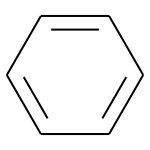

In [68]:
m = Chem.MolFromSmiles('c1ccccc1')

Chem.Draw.MolToImage(m, size=(150, 150))

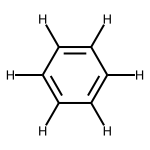

In [70]:
m_H = Chem.AddHs(m)
Chem.Draw.MolToImage(m_H, size=(150, 150))

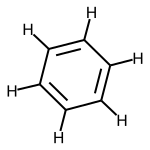

In [72]:
AllChem.EmbedMolecule(m_H)
Chem.Draw.MolToImage(m_H, size=(150, 150))

In [73]:
# Fingerprint using RDKits

from rdkit import DataStructs

ms = [Chem.MolFromSmiles('CCOC'), Chem.MolFromSmiles('CCO'), Chem.MolFromSmiles('COC')]

fps = [Chem.RDKFingerprint(mol) for mol in ms]

In [74]:
fps

In [82]:
# Similarity

DataStructs.FingerprintSimilarity(fps[0], fps[1]) # Taminoto smiliary

0.6

In [83]:
DataStructs.FingerprintSimilarity(fps[0], fps[1], metric=DataStructs.DiceSimilarity)

0.75

In [86]:
# MACCSKeys - 166 public keys

from rdkit.Chem import MACCSkeys

fps = [MACCSkeys.GenMACCSKeys(mol) for mol in ms]
fps

In [87]:
DataStructs.FingerprintSimilarity(fps[0], fps[1])

0.5

In [88]:
DataStructs.FingerprintSimilarity(fps[0], fps[1], metric=DataStructs.DiceSimilarity)


0.6666666666666666

In [96]:
# Morgan FingerPrints, 다른 말로 ECFP
# radius 를 확인해봐야함 1 - ECFP2, 2 - ECFP4

from rdkit.Chem import AllChem

fps = [AllChem.GetMorganFingerprint(mol, 2) for mol in ms]
fps

In [98]:
# 정수 list 가 아니라 bit vector 로 변환하여 보통 사용

fps = [AllChem.GetMorganFingerprintAsBitVect(mol, 2) for mol in ms]
fps

In [99]:
fps[0]

In [100]:
len(fps[0])

2048

In [102]:
DataStructs.FingerprintSimilarity(fps[0], fps[1])
# 특정 분자와 매우 유사한 것들만 고르겠다... 이런 것에 이용 한다

0.2727272727272727